<a href="https://www.kaggle.com/code/simonflora/philippines-endurance-events-analysis?scriptVersionId=271724137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
path = '/kaggle/input/philippine-fun-run-and-race-results/df_race_results.csv'
df_results = pd.read_csv(path)
df_results.head()

,raceNick,raceCategory,pseudoID,rank,obfuscatedName,nameHash,gender,gunTimeDisplay,chipTimeDisplay,gunTimeHours,chipTimeHours
0,front-act-run-2025,10KM,front-act-run-2025-0001-m-10km,1,A******* J*** P******,338503000454635,M,0h 40m 20s,0h 40m 20s,0.67222,0.67222
1,front-act-run-2025,10KM,front-act-run-2025-0002-m-10km,2,V****** P******,813008676782238,M,0h 47m 25s,0h 47m 25s,0.79028,0.79028
2,front-act-run-2025,10KM,front-act-run-2025-0003-m-10km,3,C******* E**** M********* M*********,96511164380004,M,0h 49m 22s,0h 49m 22s,0.82278,0.82278
3,front-act-run-2025,10KM,front-act-run-2025-0004-m-10km,4,L******* F**** A******,758406208993005,M,0h 51m 40s,0h 51m 40s,0.86111,0.86111
4,front-act-run-2025,10KM,front-act-run-2025-0005-m-10km,5,R***** M******,622236221477024,M,0h 51m 44s,0h 51m 40s,0.86222,0.86111


In [3]:
path = '/kaggle/input/philippine-fun-run-and-race-results/df_races.csv'
df_races = pd.read_csv(path)
df_races.head()

,name,raceDate,raceNick
0,RUN for the Warriors of the House of Hope,"October 26, 2025",run-for-the-warriors-of-the-house-of-hope-2025
1,Front Act Run 2025,"October 26, 2025",front-act-run-2025
2,Sambuokan Half Marathon 2025,"October 26, 2025",sambuokan-half-marathon-2025
3,Poveda Legado Run,"October 26, 2025",poveda-legado-run-2025
4,Subic Bay Freeport Zone Half Marathon,"October 19, 2025",subic-bay-freeport-zone-half-marathon-2025


In [4]:
df = pd.merge(df_races, df_results, on="raceNick", how="inner")
df.head()

,name,raceDate,raceNick,raceCategory,pseudoID,rank,obfuscatedName,nameHash,gender,gunTimeDisplay,chipTimeDisplay,gunTimeHours,chipTimeHours
0,RUN for the Warriors of the House of Hope,"October 26, 2025",run-for-the-warriors-of-the-house-of-hope-2025,10KM,run-for-the-warriors-of-the-house-of-hope-2025...,1,J**** O******,390265942316805,M,0h 45m 13s,0h 45m 6s,0.75361,0.75167
1,RUN for the Warriors of the House of Hope,"October 26, 2025",run-for-the-warriors-of-the-house-of-hope-2025,10KM,run-for-the-warriors-of-the-house-of-hope-2025...,2,J***** L***,187788465568744,M,0h 46m 29s,0h 46m 27s,0.77472,0.77417
2,RUN for the Warriors of the House of Hope,"October 26, 2025",run-for-the-warriors-of-the-house-of-hope-2025,10KM,run-for-the-warriors-of-the-house-of-hope-2025...,3,B**** R****,130376118336828,M,0h 46m 34s,0h 46m 33s,0.77611,0.77583
3,RUN for the Warriors of the House of Hope,"October 26, 2025",run-for-the-warriors-of-the-house-of-hope-2025,10KM,run-for-the-warriors-of-the-house-of-hope-2025...,4,V****** D*******,274760938190600,M,0h 49m 15s,0h 49m 11s,0.82083,0.81972
4,RUN for the Warriors of the House of Hope,"October 26, 2025",run-for-the-warriors-of-the-house-of-hope-2025,10KM,run-for-the-warriors-of-the-house-of-hope-2025...,5,J*** M****** O********,375259465494836,M,0h 50m 1s,0h 49m 59s,0.83361,0.83306


In [5]:
df.shape

(373607, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373607 entries, 0 to 373606
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             373607 non-null  object 
 1   raceDate         373607 non-null  object 
 2   raceNick         373607 non-null  object 
 3   raceCategory     373607 non-null  object 
 4   pseudoID         373607 non-null  object 
 5   rank             373607 non-null  int64  
 6   obfuscatedName   373607 non-null  object 
 7   nameHash         373607 non-null  int64  
 8   gender           373607 non-null  object 
 9   gunTimeDisplay   373607 non-null  object 
 10  chipTimeDisplay  373607 non-null  object 
 11  gunTimeHours     373607 non-null  float64
 12  chipTimeHours    373607 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 37.1+ MB


In [7]:
df.describe()

,rank,nameHash,gunTimeHours,chipTimeHours
count,373607.000000,3.736070e+05,373607.000000,373607.000000
mean,592.500689,5.011583e+14,1.645568,1.612074
std,789.179234,2.884750e+14,1.167453,1.161447
min,1.000000,1.399799e+09,0.025830,0.000000
25%,128.000000,2.509215e+14,0.913890,0.888890
50%,322.000000,5.013801e+14,1.414720,1.379440
75%,738.000000,7.504923e+14,2.011390,1.966390
max,6727.000000,9.999943e+14,26.245000,26.243890


# Data Cleaning

In [8]:
df.isnull().sum()

name               0
raceDate           0
raceNick           0
raceCategory       0
pseudoID           0
rank               0
obfuscatedName     0
nameHash           0
gender             0
gunTimeDisplay     0
chipTimeDisplay    0
gunTimeHours       0
chipTimeHours      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['raceDate'] = pd.to_datetime(df['raceDate'], errors='coerce')
df['raceDate'].dtypes

dtype('<M8[ns]')

In [11]:
df['rank'] = df['rank'].astype(int)
df['rank'].dtypes

dtype('int64')

In [12]:
df = df.drop([
    'raceNick',
    'pseudoID',
    'obfuscatedName',
    'nameHash',
    'chipTimeDisplay',
    'gunTimeHours',
    'chipTimeHours',
    'raceDate_y',
    'raceDate_x'
], axis=1, errors='ignore')

In [13]:
len(df['name'].unique())

242

In [14]:
def normalize_category(cat):
    if pd.isna(cat):
        return cat
    cat = str(cat).upper().strip()

    if re.search(r"SUB\s*1", cat):
        return "10KM"
    if re.search(r"SUB\s*2", cat):
        return "21KM"

    if "12K" in cat:
        return "12KM"
    if "21K" in cat:
        return "21KM"
    if "42K" in cat:
        return "42KM"
    if "16K" in cat:
        return "16KM"
    if "10K" in cat:
        return "10KM"
    if "3K" in cat:
        return "3KM"

    if "PET" in cat or "DOG" in cat:
        return "Pet Run"

    match = re.match(r"(\d+)\s*KM", cat)
    if match:
        return f"{match.group(1)}KM"

    return cat

df['raceCategory_mapped'] = df['raceCategory'].apply(normalize_category)

In [15]:
df['gunTimeDisplay_parsed'] = pd.to_timedelta(df['gunTimeDisplay'])

In [16]:
df['gunTimeDisplay_parsed'].dtypes

dtype('<m8[ns]')

In [17]:
df.head()

,name,raceDate,raceCategory,rank,gender,gunTimeDisplay,raceCategory_mapped,gunTimeDisplay_parsed
0,RUN for the Warriors of the House of Hope,2025-10-26,10KM,1,M,0h 45m 13s,10KM,0 days 00:45:13
1,RUN for the Warriors of the House of Hope,2025-10-26,10KM,2,M,0h 46m 29s,10KM,0 days 00:46:29
2,RUN for the Warriors of the House of Hope,2025-10-26,10KM,3,M,0h 46m 34s,10KM,0 days 00:46:34
3,RUN for the Warriors of the House of Hope,2025-10-26,10KM,4,M,0h 49m 15s,10KM,0 days 00:49:15
4,RUN for the Warriors of the House of Hope,2025-10-26,10KM,5,M,0h 50m 1s,10KM,0 days 00:50:01


In [18]:
df['raceCategory_mapped'].unique()

array(['10KM', '3KM', '5KM', '21KM', '1.5KM', '16KM', '42KM', '25KM',
       '8KM', '2KM', 'Pet Run', '1KM', '6KM', '15KM', '30KM', '75KM',
       '12KM', 'OPEN%20WAVE', 'KIDS%20AQUATHLON%20-%2012%20TO%2014',
       'KIDS%20AQUATHLON%20-%2015%20TO%2018',
       'KIDS%20AQUATHLON%20-%206%20TO%208',
       'KIDS%20AQUATHLON%20-%209%20TO%2011',
       'MODIFIED%20STANDARD%20-%202%20MAN%20TEAM%20RELAY',
       'MODIFIED%20STANDARD%20-%20SOLO', 'SPRINT', '32KM', '4KM', '24KM',
       '18KM', '50KM', 'AGE%20GROUP', 'ELITE', 'MTB%20OPEN', 'RELAY',
       '4.4KM', 'STANDARD', 'TRI%20DAVOR%2011%20TO%2012',
       'TRI%20DAVOR%2013%20TO%2015', 'TRI%20DAVOR%205KM%20BEACH%20RUN',
       'TRI%20DAVOR%208%20UNDER', 'TRI%20DAVOR%209%20TO%2010',
       'SPRINT%20DISTANCE', 'STANDARD%20DISTANCE', '9KM', '7KM', '200M',
       '120KM', '240KM', '60KM', 'LANORTE%20GIRL%202024',
       'LANORTE%20KIDS%20DUATHLON', 'RELAY%20SND100', 'SND100', 'SND50',
       '4X5KM%20RELAY', '500M', 'MTB%20FULL%20DISTANCE',

# Data Visualization

### Number of Events Per Year

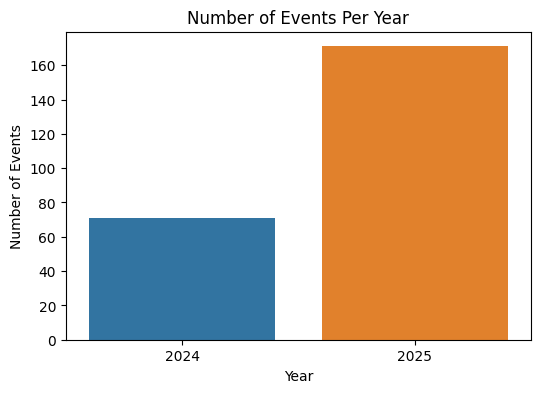

In [19]:
df['year'] = df['raceDate'].dt.year

events_per_year = df.groupby('year')['name'].nunique().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=events_per_year, x='year', y='name')
plt.title('Number of Events Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

### Number of Participants per Year

In [20]:
df['name'].nunique()

242

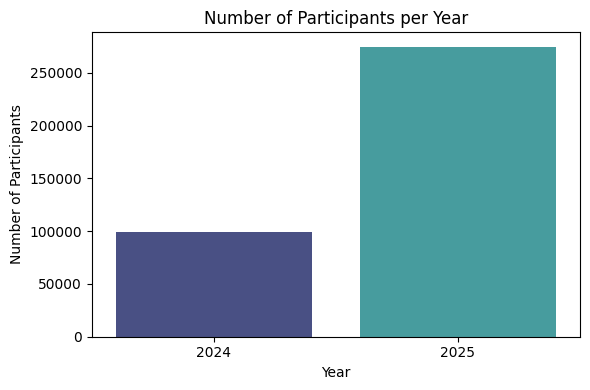

In [21]:
participants_per_year = df.groupby('year').size().reset_index(name='participants')

plt.figure(figsize=(6,4))
sns.barplot(data=participants_per_year, x='year', y='participants', palette='mako')

plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('Number of Participants per Year')
plt.tight_layout()
plt.show()

### Top 10 Race Categories per Year

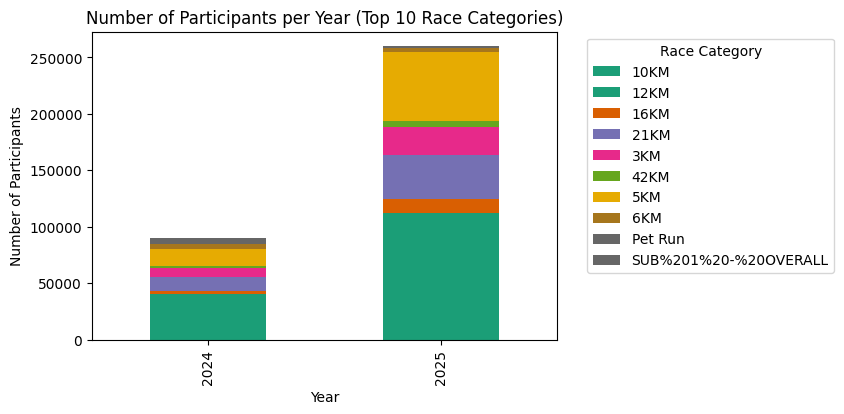

In [22]:
participants_per_year_cat = (df.groupby(['year','raceCategory_mapped']).size().reset_index(name='participants'))

top10_cat = (participants_per_year_cat.groupby('raceCategory_mapped')['participants'].sum().nlargest(10).index)
participants_top10 = participants_per_year_cat[participants_per_year_cat['raceCategory_mapped'].isin(top10_cat)]

pivot_df = participants_top10.pivot(index='year', columns='raceCategory_mapped', values='participants').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Dark2')

plt.title('Number of Participants per Year (Top 10 Race Categories)')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Race Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout
plt.show()

### Treemap of Top 10 Race Categories

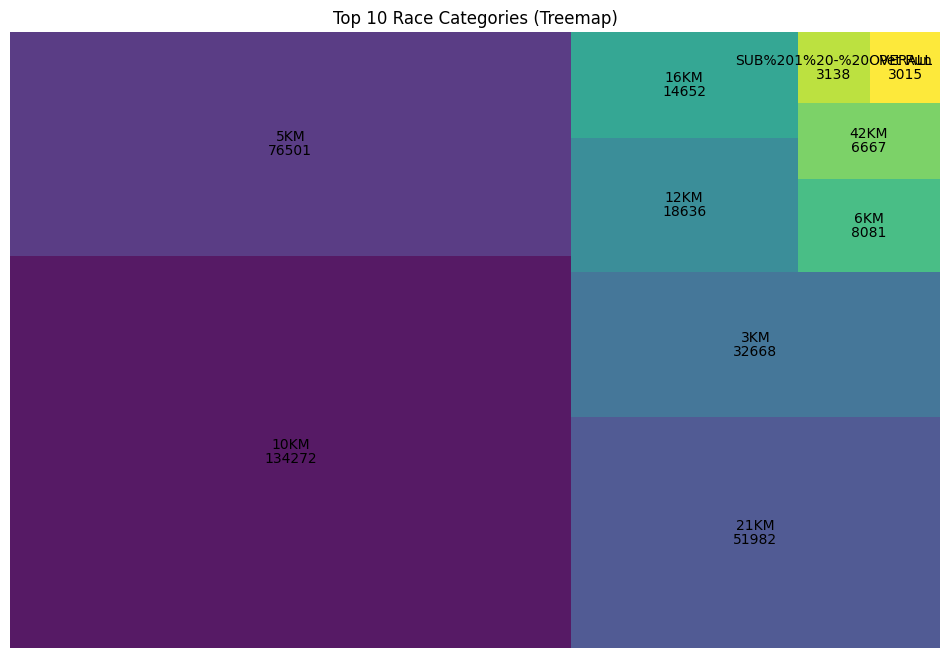

In [23]:
treemap = df['raceCategory_mapped'].value_counts().nlargest(10)

plt.figure(figsize=(12,8))
squarify.plot(
    sizes=treemap.values,
    label=treemap.index,
    value=treemap.values,
    alpha=0.9,
    color=plt.cm.viridis(np.linspace(0,1,len(treemap)))
)

plt.title('Top 10 Race Categories (Treemap)')
plt.axis('off')
plt.show()

### Gender Distribution of Participants

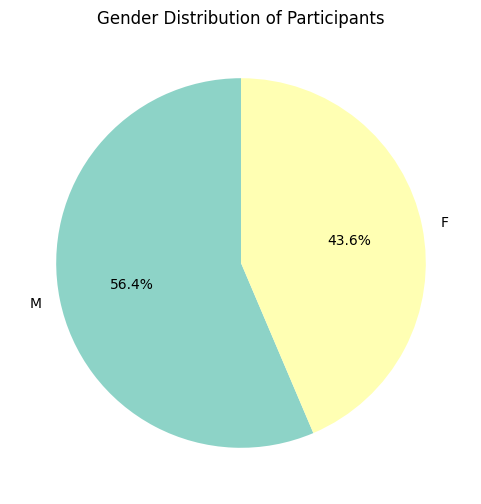

In [24]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index ,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Gender Distribution of Participants')
plt.show()

### Gender Distribution of Race Winners

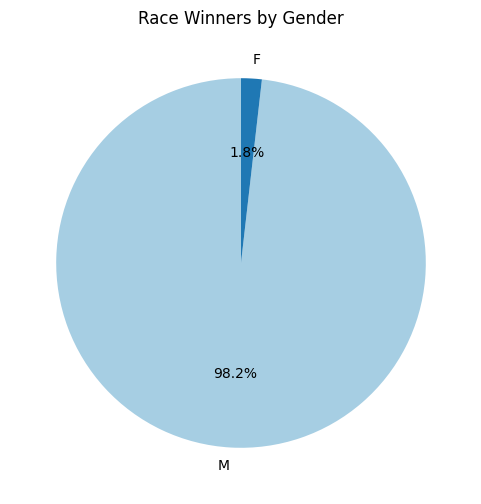

In [25]:
winners = df[df['rank'] == 1]
winner_counts = winners['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired'))
plt.title('Race Winners by Gender')
plt.show()

### Top 10 Biggest Events by Number of Participants

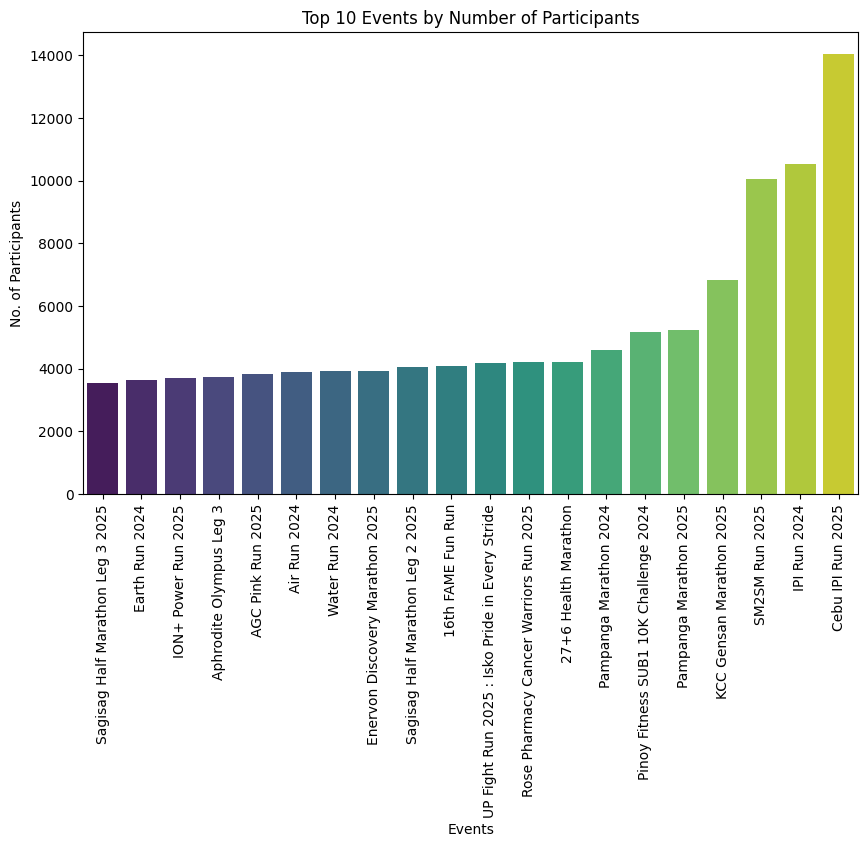

In [26]:
par_counts = df['name'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=par_counts.index, y=par_counts.values, palette='viridis', order=par_counts.index[::-1])

plt.xlabel('Events')
plt.ylabel('No. of Participants')
plt.title('Top 10 Events by Number of Participants')
plt.xticks(rotation=90)
plt.show()

### Number of Monthly Events

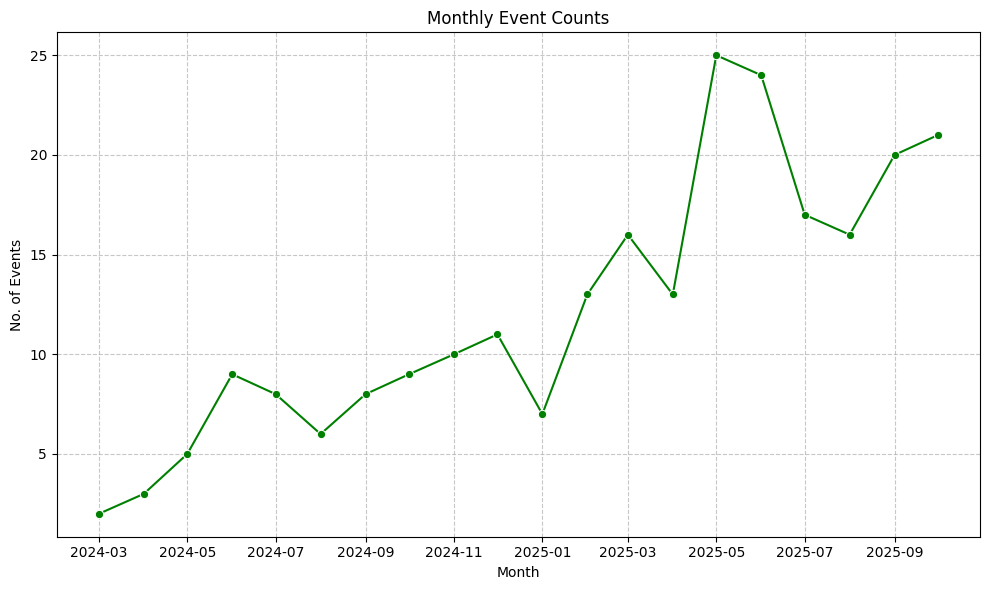

In [27]:
monthly_events = df.groupby(df['raceDate'].dt.to_period('M'))['name'].nunique()
monthly_events.index = monthly_events.index.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_events.index, y=monthly_events.values, marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('No. of Events')
plt.title('Monthly Event Counts')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Count of Monthly Participants

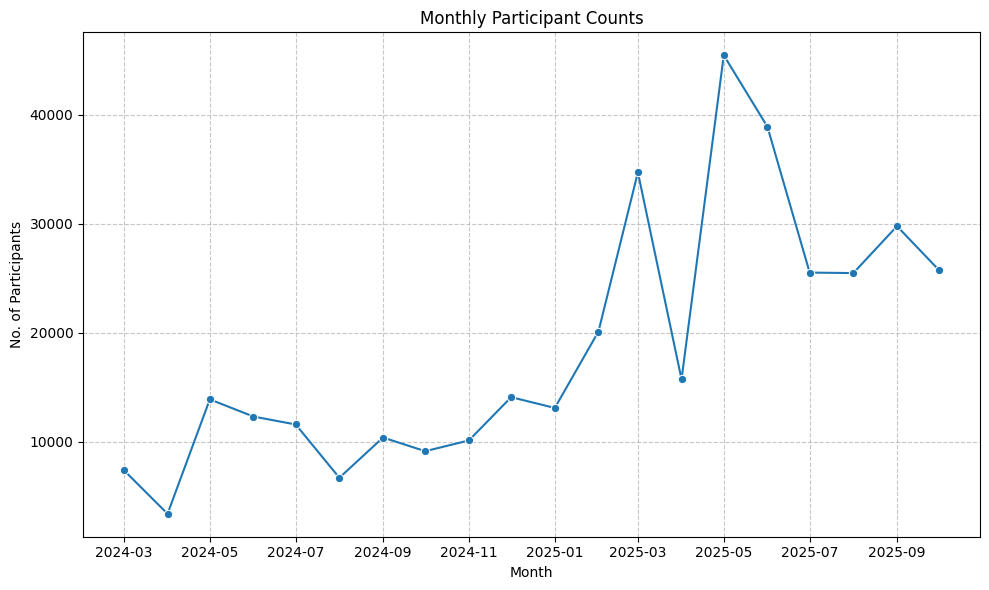

In [28]:
monthly = df.groupby(df['raceDate'].dt.to_period('M')).size()
monthly.index = monthly.index.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
plt.xlabel('Month')
plt.ylabel('No. of Participants')
plt.title('Monthly Participant Counts')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Fastest Times in Selected Categories

In [29]:
categories = ['3KM', '5KM', '10KM', '16KM', '21KM','32KM', '42KM']

fastest_times = (
    df[(df['raceCategory_mapped'].isin(categories))
    & (df['name'] != 'Apollo Olympus Leg 1')
    & (df['gender'] == 'M')]
    .loc[lambda x: x.groupby('raceCategory_mapped')['gunTimeDisplay_parsed'].idxmin(),
        ['name','raceCategory_mapped','raceDate','gender','gunTimeDisplay_parsed']]
    .reset_index(drop=True)
)

fastest_times['raceCategory_mapped'] = pd.Categorical(
    fastest_times['raceCategory_mapped'],
    categories=categories,
    ordered=True
)

fastest_times = fastest_times.sort_values('raceCategory_mapped').reset_index(drop=True)
fastest_times

,name,raceCategory_mapped,raceDate,gender,gunTimeDisplay_parsed
0,Solemate PHC Charity Fun Run 2025,3KM,2025-02-09,M,0 days 00:09:08
1,KCC Gensan Marathon 2025,5KM,2025-08-30,M,0 days 00:14:11
2,Nueva Ecija Marathon 2025,10KM,2025-07-06,M,0 days 00:30:24
3,Capas 32 Challenge Leg 2,16KM,2025-08-24,M,0 days 00:53:47
4,MNL City Run 2024 Series: Time 2 Run 4ward Leg...,21KM,2024-03-17,M,0 days 01:09:15
5,KCC Gensan Marathon 2025,32KM,2025-08-30,M,0 days 01:53:40
6,CITY OF SMILES INTERNATIONAL MARATHON 2025,42KM,2025-10-12,M,0 days 02:23:37


### Fastest Times in Selected Categories (Women)

In [30]:
female_fastest_times = (
    df[(df['raceCategory_mapped'].isin(categories))
    & (df['name'] != 'Apollo Olympus Leg 1')
    & (df['gender'] == 'F')]
    .loc[lambda x: x.groupby('raceCategory_mapped')['gunTimeDisplay_parsed'].idxmin(),
        ['name','raceCategory_mapped','raceDate','gender','gunTimeDisplay_parsed']]
    .reset_index(drop=True)
)

female_fastest_times['raceCategory_mapped'] = pd.Categorical(
    female_fastest_times['raceCategory_mapped'],
    categories=categories,
    ordered=True
)

female_fastest_times = female_fastest_times.sort_values('raceCategory_mapped').reset_index(drop=True)
female_fastest_times

,name,raceCategory_mapped,raceDate,gender,gunTimeDisplay_parsed
0,Solemate PHC Charity Fun Run 2025,3KM,2025-02-09,F,0 days 00:11:37
1,Global Surveyor’s Day Fun Run 2025,5KM,2025-03-23,F,0 days 00:18:34
2,ASICS META : Time : Trials Philippines,10KM,2025-10-19,F,0 days 00:36:23
3,Angel’s Pizza Sama-Sama Run 2025,16KM,2025-01-12,F,0 days 01:04:07
4,SM2SM Run 2025,21KM,2025-03-09,F,0 days 01:23:24
5,KCC Gensan Marathon 2025,32KM,2025-08-30,F,0 days 02:18:28
6,Bukidnon International Marathon 2025,42KM,2025-04-20,F,0 days 03:08:34


### Average Times in Selected Categories by Gender

In [31]:
average_times = (
    df[(df['raceCategory_mapped'].isin(categories))
       & (df['name'] != 'Apollo Olympus Leg 1')]
    .groupby(['raceCategory_mapped', 'gender'], as_index=False)['gunTimeDisplay_parsed']
    .mean()
)

average_times['gunTimeDisplay_parsed'] = average_times['gunTimeDisplay_parsed'].apply(
    lambda x: str(x).split('.')[0]
)

average_times['raceCategory_mapped'] = pd.Categorical(
    average_times['raceCategory_mapped'],
    categories=categories,
    ordered=True
)

average_times = average_times.sort_values(['raceCategory_mapped', 'gender']).reset_index(drop=True)
average_times

,raceCategory_mapped,gender,gunTimeDisplay_parsed
0,3KM,F,0 days 00:44:47
1,3KM,M,0 days 00:53:26
2,5KM,F,0 days 00:54:58
3,5KM,M,0 days 00:49:07
4,10KM,F,0 days 01:37:34
5,10KM,M,0 days 01:25:29
6,16KM,F,0 days 02:21:14
7,16KM,M,0 days 02:05:18
8,21KM,F,0 days 02:58:04
9,21KM,M,0 days 02:38:27


In [32]:
# df.to_csv("/kaggle/working/cleaned_endurance_events.csv", index=False)